<a href="https://colab.research.google.com/github/munavarhs/Pollution_Analysis_of_Beijing_City/blob/main/Pollution_Analysis_of_Beijing_City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer

#importing Machine Learning algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

#import GridSearchCV for optimal k
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score, make_scorer

#Question2 imports
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from scipy.stats import mode

import warnings



In [ ]:
# Load the dataset
df = pd.read_csv("BeijingPM20100101_20151231.csv")

In [ ]:
# Displaying the  first few rows
df.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


In [ ]:
# As there are missing values, drop them
columns_drop = ['PM_Nongzhanguan', 'PM_Dongsihuan','PM_Dongsi','PM_US Post']
df_cleaned = df.drop(columns=columns_drop, axis = 1)
df_cleaned = df.dropna(subset=['PM_US Post','PM_Nongzhanguan', 'PM_Dongsihuan','PM_Dongsi'])

In [ ]:
weather_columns = ['DEWP','HUMI','PRES','TEMP','cbwd','Iws','precipitation','Iprec']
imputer = SimpleImputer(strategy='most_frequent')
df_cleaned.loc[:, weather_columns] = imputer.fit_transform(df_cleaned[weather_columns])
# df_cleaned = df_cleaned.dropna(subset=weather_columns_drop)

In [ ]:
# OneHotEncoding for  categorical variables like wind direction, season
column_transformer = make_column_transformer(
    (OneHotEncoder(), ['cbwd']),
    remainder='passthrough'
)

In [ ]:
#Transforming the rows
df_transformed = column_transformer.fit_transform(df_cleaned)

In [ ]:
#Converting DataFrame for further processing
df_transformed_data = pd.DataFrame(df_transformed, columns = column_transformer.get_feature_names_out())

In [ ]:
#Display the cleaned and transformed data
df_transformed_data.head()

,onehotencoder__cbwd_NE,onehotencoder__cbwd_NW,onehotencoder__cbwd_SE,onehotencoder__cbwd_cv,remainder__No,remainder__year,remainder__month,remainder__day,remainder__hour,remainder__season,...,remainder__PM_Dongsihuan,remainder__PM_Nongzhanguan,remainder__PM_US Post,remainder__DEWP,remainder__HUMI,remainder__PRES,remainder__TEMP,remainder__Iws,remainder__precipitation,remainder__Iprec
0,0.0,0.0,0.0,1.0,27825.0,2013.0,3.0,5.0,8.0,1.0,...,166.0,140.0,150.0,-6.0,59.0,1019.0,1.0,0.89,0.0,0.0
1,0.0,0.0,0.0,1.0,27826.0,2013.0,3.0,5.0,9.0,1.0,...,165.0,152.0,163.0,-8.0,38.0,1019.0,5.0,1.78,0.0,0.0
2,0.0,0.0,0.0,1.0,27827.0,2013.0,3.0,5.0,10.0,1.0,...,173.0,128.0,172.0,-8.0,31.0,1018.0,8.0,2.67,0.0,0.0
3,0.0,0.0,0.0,1.0,27829.0,2013.0,3.0,5.0,12.0,1.0,...,182.0,3.0,181.0,-9.0,23.0,1017.0,11.0,4.45,0.0,0.0
4,0.0,0.0,0.0,1.0,27830.0,2013.0,3.0,5.0,13.0,1.0,...,169.0,3.0,187.0,-9.0,22.0,1015.0,12.0,5.34,0.0,0.0


In [ ]:
#Defining feature variables, all colums except target variable
X = df_transformed_data.drop(columns=['remainder__PM_Dongsihuan','remainder__PM_Nongzhanguan','remainder__PM_Dongsi','remainder__PM_US Post'])

In [ ]:
#Defining target variable
y = df_transformed_data['remainder__PM_US Post']
# y = df_transformed_data['remainder__PM_Dongsihuan']
# y = df_transformed_data['remainder__PM_Dongsi']
# y = df_transformed_data['remainder__PM_Nongzhanguan']

In [ ]:
#Spliting the data into train and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)


In [ ]:
#Intializing Linear Model. Prediction and evaluation

#Intialize the model
linear_model = LinearRegression()

#Train the model
linear_model.fit(X_train, y_train)

#Prediction using linear model
y_pred_linear = linear_model.predict(X_test)

#Evaluation of perfromance using RMSE and r2_score
linear_rmse_score = np.sqrt(mean_squared_error(y_test,y_pred_linear))
linear_r2_score = r2_score(y_test, y_pred_linear)

In [ ]:
#The task is to find optimal K
#Create a grid of potential values for k

param_grid = {'n_neighbors':np.arange(1,21)}

#Using GridSearchCV
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

#Fit The Model
grid_search.fit(X_train, y_train)

#Extract optimal k
optimal_k = grid_search.best_params_['n_neighbors']

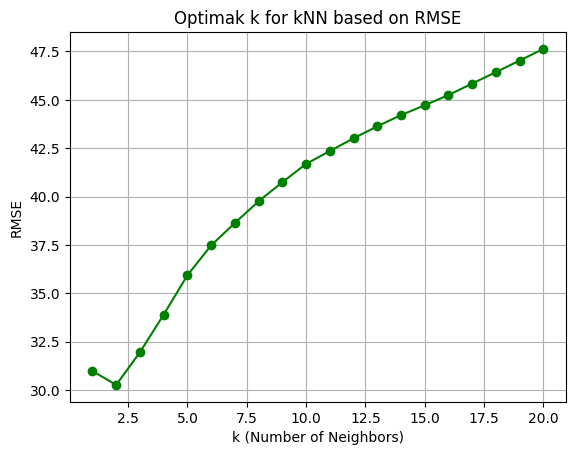

In [ ]:
results = grid_search.cv_results_
mean_test_rmse = -results['mean_test_score']
k_values = np.arange(1,21)

plt.plot(k_values, np.sqrt(mean_test_rmse), marker='o', linestyle='-', color='g')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RMSE')
plt.title('Optimak k for kNN based on RMSE')
plt.grid(True)
plt.show()


In [ ]:
#By looking at the graph its clear that optimal k value value would be 2.

#Printing optimal k value
print(optimal_k)
#Intializing kNN Model. Prediction and evaluation

#Initialize the model
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)

#Train the model
knn_optimal.fit(X_train, y_train)

#Prediction using kNN model
y_pred_knn = knn_optimal.predict(X_test)

#Evaluation of performance using RMSE and r2_score
knn_rmse_optimal_score = np.sqrt(mean_squared_error(y_test, y_pred_knn))
knn_r2_optimal_score = r2_score(y_test, y_pred_knn)
#Comparing the performances of Linear and kNN Models
print('Displaying evaluation metrics of kNN and Linear models for PM_US Post City\n')

print(f'RMSE score of Linear Model: {linear_rmse_score:.2f}')
print(f'r2_score of Linear Model: {linear_r2_score:.2f}')
print('\n')
print(f'RMSE score of kNN Model: {knn_rmse_optimal_score:.2f}')
print(f'r2_score of kNN Model: {knn_r2_optimal_score:.2f}')

1
Displaying evaluation metrics of kNN and Linear models for PM_US Post City

RMSE score of Linear Model: 70.72
r2_score of Linear Model: 0.32


RMSE score of kNN Model: 26.29
r2_score of kNN Model: 0.91


In [ ]:
#[LINEAR MODEL]
#Now using kFold Cross Validation and reporting each metrics mean and standard deviation

#Setting up KFold-Cross Validation
k_folds = KFold(n_splits=5, shuffle=True, random_state=56)

#Using Cross_val_score for RMSE and R2
rmse_scores = cross_val_score(linear_model, X, y, cv = k_folds, scoring='neg_mean_squared_error')

r2_scores = cross_val_score(linear_model, X, y, cv = k_folds, scoring='r2')

#Convert RMSE scores to Positive Values
rmse_scores = np.sqrt(-rmse_scores)

#Caluclate Mean and Standard Deviation
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

mean_r2 = r2_scores.mean()
std_r2 = r2_scores.std()

mean_rmse, std_rmse, mean_r2, std_r2

(71.24309251392856,
 0.9696158518141963,
 0.30925748013733323,
 0.008493954070298924)

In [ ]:
#[kNN MODEL]
#Now using kFold Cross Validation and reporting each metrics mean and standard deviation

#Setting up KFold-Cross Validation
knn_k_folds = KFold(n_splits=5, shuffle=True, random_state=56)

#Using Cross_val_score for RMSE and R2
knn_rmse_scores = cross_val_score(knn_optimal, X, y, cv = knn_k_folds, scoring='neg_mean_squared_error')

knn_r2_scores = cross_val_score(knn_optimal, X, y, cv = knn_k_folds, scoring='r2')

#Convert RMSE scores to Positive Values
knn_rmse_scores = np.sqrt(-knn_rmse_scores)

#Caluclate Mean and Standard Deviation
knn_mean_rmse = knn_rmse_scores.mean()
knn_std_rmse = knn_rmse_scores.std()

knn_mean_r2 = knn_r2_scores.mean()
knn_std_r2 = knn_r2_scores.std()

knn_mean_rmse, knn_std_rmse, knn_mean_r2, knn_std_r2

(25.678646687050456,
 0.5682374462464238,
 0.9101628544180521,
 0.004798728220303108)

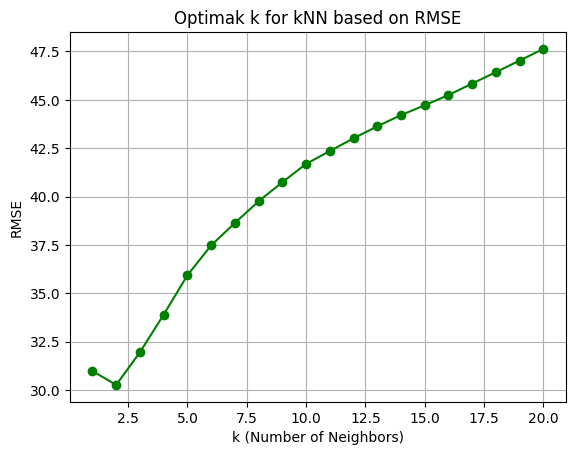

2
Displaying evaluation metrics of kNN and Linear models for city PM_Dongsihuan

RMSE score of Linear Model: 72.92
r2_score of Linear Model: 0.31


RMSE score of kNN Model: 25.56
r2_score of kNN Model: 0.91


In [ ]:
y = df_transformed_data['remainder__PM_Dongsihuan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
#Intializing Linear Model. Prediction and evaluation

#Intialize the model
linear_model = LinearRegression()

#Train the model
linear_model.fit(X_train, y_train)

#Prediction using linear model
y_pred_linear = linear_model.predict(X_test)

#Evaluation of perfromance using RMSE and r2_score
linear_rmse_score = np.sqrt(mean_squared_error(y_test,y_pred_linear))
linear_r2_score = r2_score(y_test, y_pred_linear)
#The task is to find optimal K
#Create a grid of potential values for k

param_grid = {'n_neighbors':np.arange(1,21)}

#Using GridSearchCV
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

#Fit The Model
grid_search.fit(X_train, y_train)

#Extract optimal k
optimal_k = grid_search.best_params_['n_neighbors']
results = grid_search.cv_results_
mean_test_rmse = -results['mean_test_score']
k_values = np.arange(1,21)

plt.plot(k_values, np.sqrt(mean_test_rmse), marker='o', linestyle='-', color='g')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RMSE')
plt.title('Optimak k for kNN based on RMSE')
plt.grid(True)
plt.show()
print(optimal_k)
#Intializing kNN Model. Prediction and evaluation

#Initialize the model
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)

#Train the model
knn_optimal.fit(X_train, y_train)

#Prediction using kNN model
y_pred_knn = knn_optimal.predict(X_test)

#Evaluation of performance using RMSE and r2_score
knn_rmse_optimal_score = np.sqrt(mean_squared_error(y_test, y_pred_knn))
knn_r2_optimal_score = r2_score(y_test, y_pred_knn)
#Comparing the performances of Linear and kNN Models
print('Displaying evaluation metrics of kNN and Linear models for city PM_Dongsihuan\n')

print(f'RMSE score of Linear Model: {linear_rmse_score:.2f}')
print(f'r2_score of Linear Model: {linear_r2_score:.2f}')
print('\n')
print(f'RMSE score of kNN Model: {knn_rmse_optimal_score:.2f}')
print(f'r2_score of kNN Model: {knn_r2_optimal_score:.2f}')


In [ ]:
#[LINEAR MODEL]
#Now using kFold Cross Validation and reporting each metrics mean and standard deviation

#Setting up KFold-Cross Validation
k_folds = KFold(n_splits=5, shuffle=True, random_state=56)

#Using Cross_val_score for RMSE and R2
rmse_scores = cross_val_score(linear_model, X, y, cv = k_folds, scoring='neg_mean_squared_error')

r2_scores = cross_val_score(linear_model, X, y, cv = k_folds, scoring='r2')

#Convert RMSE scores to Positive Values
rmse_scores = np.sqrt(-rmse_scores)

#Caluclate Mean and Standard Deviation
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

mean_r2 = r2_scores.mean()
std_r2 = r2_scores.std()

mean_rmse, std_rmse, mean_r2, std_r2

(73.2455156323268,
 1.5625146757788522,
 0.2957864118417472,
 0.012358168354367111)

In [ ]:
#[kNN MODEL]
#Now using kFold Cross Validation and reporting each metrics mean and standard deviation

#Setting up KFold-Cross Validation
knn_k_folds = KFold(n_splits=5, shuffle=True, random_state=56)

#Using Cross_val_score for RMSE and R2
knn_rmse_scores = cross_val_score(knn_optimal, X, y, cv = knn_k_folds, scoring='neg_mean_squared_error')

knn_r2_scores = cross_val_score(knn_optimal, X, y, cv = knn_k_folds, scoring='r2')

#Convert RMSE scores to Positive Values
knn_rmse_scores = np.sqrt(-knn_rmse_scores)

#Caluclate Mean and Standard Deviation
knn_mean_rmse = knn_rmse_scores.mean()
knn_std_rmse = knn_rmse_scores.std()

knn_mean_r2 = knn_r2_scores.mean()
knn_std_r2 = knn_r2_scores.std()

knn_mean_rmse, knn_std_rmse, knn_mean_r2, knn_std_r2

(27.01323899081347,
 0.7575721835070619,
 0.9040148893673635,
 0.006847247794859343)

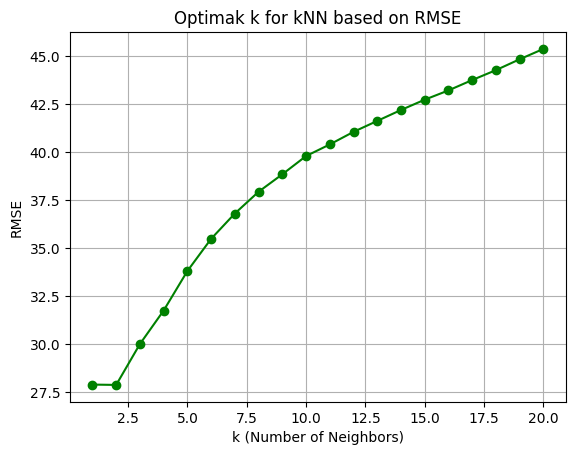



2
Displaying evaluation metrics of kNN and Linear models for city Dongsi

RMSE score of Linear Model: 70.43
r2_score of Linear Model: 0.29


RMSE score of kNN Model: 23.72
r2_score of kNN Model: 0.92


In [ ]:
y = df_transformed_data['remainder__PM_Dongsi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
#Intializing Linear Model. Prediction and evaluation

#Intialize the model
linear_model = LinearRegression()

#Train the model
linear_model.fit(X_train, y_train)

#Prediction using linear model
y_pred_linear = linear_model.predict(X_test)

#Evaluation of perfromance using RMSE and r2_score
linear_rmse_score = np.sqrt(mean_squared_error(y_test,y_pred_linear))
linear_r2_score = r2_score(y_test, y_pred_linear)
#The task is to find optimal K
#Create a grid of potential values for k

param_grid = {'n_neighbors':np.arange(1,21)}

#Using GridSearchCV
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

#Fit The Model
grid_search.fit(X_train, y_train)

#Extract optimal k
optimal_k = grid_search.best_params_['n_neighbors']
results = grid_search.cv_results_
mean_test_rmse = -results['mean_test_score']
k_values = np.arange(1,21)

plt.plot(k_values, np.sqrt(mean_test_rmse), marker='o', linestyle='-', color='g')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RMSE')
plt.title('Optimak k for kNN based on RMSE')
plt.grid(True)
plt.show()
print('\n')
print(optimal_k)
#Intializing kNN Model. Prediction and evaluation

#Initialize the model
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)

#Train the model
knn_optimal.fit(X_train, y_train)

#Prediction using kNN model
y_pred_knn = knn_optimal.predict(X_test)

#Evaluation of performance using RMSE and r2_score
knn_rmse_optimal_score = np.sqrt(mean_squared_error(y_test, y_pred_knn))
knn_r2_optimal_score = r2_score(y_test, y_pred_knn)
#Comparing the performances of Linear and kNN Models
print('Displaying evaluation metrics of kNN and Linear models for city Dongsi\n')

print(f'RMSE score of Linear Model: {linear_rmse_score:.2f}')
print(f'r2_score of Linear Model: {linear_r2_score:.2f}')
print('\n')
print(f'RMSE score of kNN Model: {knn_rmse_optimal_score:.2f}')
print(f'r2_score of kNN Model: {knn_r2_optimal_score:.2f}')


In [ ]:
#[LINEAR MODEL]
#Now using kFold Cross Validation and reporting each metrics mean and standard deviation

#Setting up KFold-Cross Validation
k_folds = KFold(n_splits=5, shuffle=True, random_state=56)

#Using Cross_val_score for RMSE and R2
rmse_scores = cross_val_score(linear_model, X, y, cv = k_folds, scoring='neg_mean_squared_error')

r2_scores = cross_val_score(linear_model, X, y, cv = k_folds, scoring='r2')

#Convert RMSE scores to Positive Values
rmse_scores = np.sqrt(-rmse_scores)

#Caluclate Mean and Standard Deviation
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

mean_r2 = r2_scores.mean()
std_r2 = r2_scores.std()

mean_rmse, std_rmse, mean_r2, std_r2

(69.83838515534077,
 1.4475267473578688,
 0.2842192891554178,
 0.010899657569823088)

In [ ]:
#[kNN MODEL]
#Now using kFold Cross Validation and reporting each metrics mean and standard deviation

#Setting up KFold-Cross Validation
knn_k_folds = KFold(n_splits=5, shuffle=True, random_state=56)

#Using Cross_val_score for RMSE and R2
knn_rmse_scores = cross_val_score(knn_optimal, X, y, cv = knn_k_folds, scoring='neg_mean_squared_error')

knn_r2_scores = cross_val_score(knn_optimal, X, y, cv = knn_k_folds, scoring='r2')

#Convert RMSE scores to Positive Values
knn_rmse_scores = np.sqrt(-knn_rmse_scores)

#Caluclate Mean and Standard Deviation
knn_mean_rmse = knn_rmse_scores.mean()
knn_std_rmse = knn_rmse_scores.std()

knn_mean_r2 = knn_r2_scores.mean()
knn_std_r2 = knn_r2_scores.std()

knn_mean_rmse, knn_std_rmse, knn_mean_r2, knn_std_r2

(24.59961882260165,
 1.0739767806261227,
 0.9109807324478757,
 0.008013019328980823)

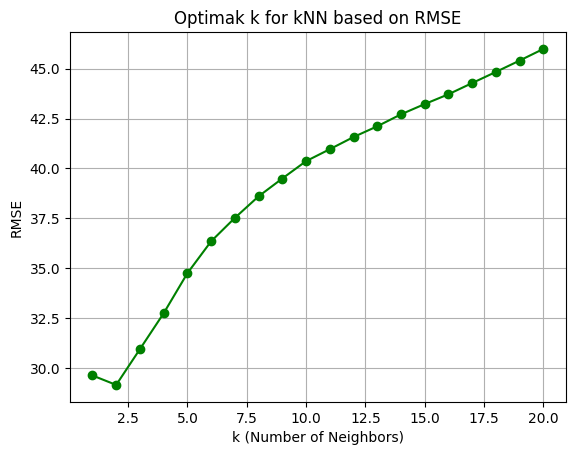



2
Displaying evaluation metrics of kNN and Linear models for city Nongzhanguan

RMSE score of Linear Model: 69.24
r2_score of Linear Model: 0.30


RMSE score of kNN Model: 23.77
r2_score of kNN Model: 0.92


In [ ]:
y = df_transformed_data['remainder__PM_Nongzhanguan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
#Intializing Linear Model. Prediction and evaluation

#Intialize the model
linear_model = LinearRegression()

#Train the model
linear_model.fit(X_train, y_train)

#Prediction using linear model
y_pred_linear = linear_model.predict(X_test)

#Evaluation of perfromance using RMSE and r2_score
linear_rmse_score = np.sqrt(mean_squared_error(y_test,y_pred_linear))
linear_r2_score = r2_score(y_test, y_pred_linear)
#The task is to find optimal K
#Create a grid of potential values for k

param_grid = {'n_neighbors':np.arange(1,21)}

#Using GridSearchCV
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

#Fit The Model
grid_search.fit(X_train, y_train)

#Extract optimal k
optimal_k = grid_search.best_params_['n_neighbors']
results = grid_search.cv_results_
mean_test_rmse = -results['mean_test_score']
k_values = np.arange(1,21)

plt.plot(k_values, np.sqrt(mean_test_rmse), marker='o', linestyle='-', color='g')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RMSE')
plt.title('Optimak k for kNN based on RMSE')
plt.grid(True)
plt.show()
print('\n')
print(optimal_k)
#Intializing kNN Model. Prediction and evaluation

#Initialize the model
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)

#Train the model
knn_optimal.fit(X_train, y_train)

#Prediction using kNN model
y_pred_knn = knn_optimal.predict(X_test)

#Evaluation of performance using RMSE and r2_score
knn_rmse_optimal_score = np.sqrt(mean_squared_error(y_test, y_pred_knn))
knn_r2_optimal_score = r2_score(y_test, y_pred_knn)
#Comparing the performances of Linear and kNN Models
print('Displaying evaluation metrics of kNN and Linear models for city Nongzhanguan\n')

print(f'RMSE score of Linear Model: {linear_rmse_score:.2f}')
print(f'r2_score of Linear Model: {linear_r2_score:.2f}')
print('\n')
print(f'RMSE score of kNN Model: {knn_rmse_optimal_score:.2f}')
print(f'r2_score of kNN Model: {knn_r2_optimal_score:.2f}')

In [ ]:
#[LINEAR MODEL]
#Now using kFold Cross Validation and reporting each metrics mean and standard deviation

#Setting up KFold-Cross Validation
k_folds = KFold(n_splits=5, shuffle=True, random_state=56)

#Using Cross_val_score for RMSE and R2
rmse_scores = cross_val_score(linear_model, X, y, cv = k_folds, scoring='neg_mean_squared_error')

r2_scores = cross_val_score(linear_model, X, y, cv = k_folds, scoring='r2')

#Convert RMSE scores to Positive Values
rmse_scores = np.sqrt(-rmse_scores)

#Caluclate Mean and Standard Deviation
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

mean_r2 = r2_scores.mean()
std_r2 = r2_scores.std()

mean_rmse, std_rmse, mean_r2, std_r2

(70.19713504781949,
 1.2985301515308971,
 0.28681463109002314,
 0.009282125895869645)

In [ ]:
#[kNN MODEL]
#Now using kFold Cross Validation and reporting each metrics mean and standard deviation

#Setting up KFold-Cross Validation
knn_k_folds = KFold(n_splits=5, shuffle=True, random_state=56)

#Using Cross_val_score for RMSE and R2
knn_rmse_scores = cross_val_score(knn_optimal, X, y, cv = knn_k_folds, scoring='neg_mean_squared_error')

knn_r2_scores = cross_val_score(knn_optimal, X, y, cv = knn_k_folds, scoring='r2')

#Convert RMSE scores to Positive Values
knn_rmse_scores = np.sqrt(-knn_rmse_scores)

#Caluclate Mean and Standard Deviation
knn_mean_rmse = knn_rmse_scores.mean()
knn_std_rmse = knn_rmse_scores.std()

knn_mean_r2 = knn_r2_scores.mean()
knn_std_r2 = knn_r2_scores.std()

knn_mean_rmse, knn_std_rmse, knn_mean_r2, knn_std_r2

(25.580956553550863,
 1.1160972884351872,
 0.9050522321345138,
 0.008673624467272696)

In [ ]:
#QUESTION-2

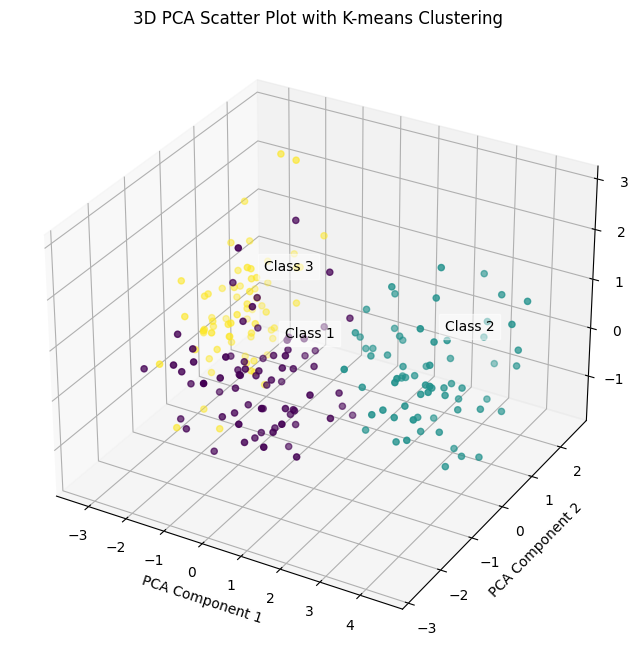

In [ ]:


# Load the data
file_path = './seeds_dataset.txt'
seeds_data = pd.read_csv(file_path, sep='\s+', header=None)

# Separate features and labels
features = seeds_data.iloc[:, :-1]
true_labels = seeds_data.iloc[:, -1]

# Standardize the feature data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_assignments = kmeans.fit_predict(scaled_features)

# Perform PCA for 3D visualization
pca = PCA(n_components=3)
features_pca = pca.fit_transform(scaled_features)

# Map clusters to the original labels
cluster_to_label_mapping = {}
for cluster in range(3):
    cluster_to_label_mapping[cluster] = mode(true_labels[cluster_assignments == cluster], keepdims=True)[0][0]

# Map cluster assignments to true labels for comparison
predicted_labels = [cluster_to_label_mapping[cluster] for cluster in cluster_assignments]

# Plot 3D PCA scatter plot with cluster visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for class_name, class_label in [('Class 1', 1), ('Class 2', 2), ('Class 3', 3)]:
    ax.text(
        features_pca[true_labels == class_label, 0].mean(),
        features_pca[true_labels == class_label, 1].mean() + 1.5,
        features_pca[true_labels == class_label, 2].mean(),
        class_name,
        horizontalalignment='center',
        bbox=dict(alpha=0.5, edgecolor='w', facecolor='w')
    )

# Reorder predicted labels for consistent coloring in the plot
ordered_predicted_labels = np.choose(cluster_assignments, [1, 2, 0]).astype(float)

ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c=ordered_predicted_labels, cmap='viridis')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title("3D PCA Scatter Plot with K-means Clustering")
plt.show()




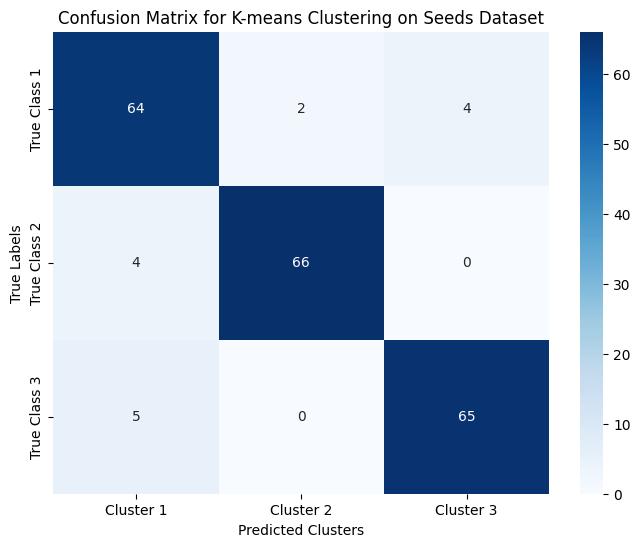

In [ ]:
# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 1', 'Cluster 2', 'Cluster 3'], yticklabels=['True Class 1', 'True Class 2', 'True Class 3'])
plt.xlabel('Predicted Clusters')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for K-means Clustering on Seeds Dataset')
plt.show()